# Lösungen zu den Übungen zur Vorlesung "Grundlegende Algorithmen und Verfahren der KI"

### Aufgabe 5

Eine Liste der zu besuchenden Städte mit den Koordinaten $(x,y)$ wird definiert. Danach wird eine Population von $25$ Rundreisen aufgesetzt.

In [26]:
import numpy as np

StaedteListe = np.array([[0.5, 4], [3, 0.9], [4, 4], [5, 1], [0.2, 0.3], [6, 3], [2.5, 2], [3, 3], [4, 2], [1, 2]])

In [27]:
def InitPopulation(numStaedte, numIndividuen):
    population = np.array([], dtype = int)
    rng = np.random.default_rng(5778)
    
    for i in range(numIndividuen):
        population = np.append(population, rng.permutation(numStaedte))
    
    population = population.reshape((numIndividuen, numStaedte))
    return population

In [28]:
Population = InitPopulation(np.shape(StaedteListe)[0], 25)

Die folgende Funktion ermittelt aus der Population von Rundreisen und der Städteliste die in der Population optimale Rundreise ung gibt die zugehörigen Kosten (Weglänge) aus.

In [29]:
def OptRundreise(rundreisen, staedte):
    # Anzahl der Städte
    ns = np.shape(rundreisen)[1]
    # optimale Rundreise
    iOpt = 0
    # minimale Kosten
    minKosten = -1
    
    # Schleife über alle Rundreisen
    for i in range(np.shape(rundreisen)[0]):
        kosten = 0.0
        vorgStadt = -1
        
        # Schleife über alle Städte der Rundreise
        for j in range(ns):
            x1 = staedte[rundreisen[i][vorgStadt]][0]
            x2 = staedte[rundreisen[i][j]][0]
            y1 = staedte[rundreisen[i][vorgStadt]][1]
            y2 = staedte[rundreisen[i][j]][1]
            
            kosten = kosten + np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            vorgStadt = j
            
        if minKosten < 0:
            # es wurden bisher noch keine Kosten für eine Rundreise berechnet
            iOpt = i
            minKosten = kosten
        else:
            # es gibt schon ein temporäres Minimum
            if kosten < minKosten:
                iOpt = i
                minKosten = kosten
    
    return (iOpt, minKosten)

Nun werden die entsprechenden Funktione zur Selektion, Mutation und Rekombination entworfen. Dabei werden die Vorgaben aus der Aufgabenstellung berücksichtigt. Ein vollständiger Lauf umfasst soviele Einzeltransformationen wie die Population Individuen hat, im vorliegenden Fall $25$. Dabei werden die Individuen per Zufall ausgewählt.

In [30]:
def Selektion(rundreisen, staedte, seed):
    rng = np.random.default_rng(seed)
    rundreisenNeu = np.copy(rundreisen)

    # Bestimmung des Optimums
    (iopt, opt) = OptRundreise(rundreisen, staedte)

    # Schleife über die Anzahl der Individuen
    for i in range(np.shape(rundreisen)[0]):

        isel = iopt

        # ein Individuum zufällig auswählen das nicht das optimale ist
        while isel == iopt:
            isel = rng.integers(0, np.shape(rundreisen)[0])

        # Individumum ersetzen
        new = rng.permutation(np.shape(staedte)[0])
        rundreisenNeu = np.delete(rundreisenNeu, isel, 0)
        rundreisenNeu = np.insert(rundreisenNeu, isel, [new], 0)

    return rundreisenNeu

In [31]:
def Mutation(rundreisen, staedte, seed):
    rng = np.random.default_rng(seed)
    rundreisenNeu = np.copy(rundreisen)

    # Bestimmung des Optimums
    (iopt, opt) = OptRundreise(rundreisen, staedte)

    # Schleife über die Anzahl der Individuen
    for i in range(np.shape(rundreisen)[0]):

        isel = iopt

        # ein Individuum zufällig auswählen das nicht das optimale ist
        while isel == iopt:
            isel = rng.integers(0, np.shape(rundreisen)[0])

        # zwei Städte vertauschen
        stadt1 = rng.integers(0, np.shape(rundreisen)[1])
        stadt2 = stadt1
        
        while stadt2 == stadt1:
            stadt2 = rng.integers(0, np.shape(rundreisen)[1])
        
        temp = rundreisenNeu[isel][stadt1]
        rundreisenNeu[isel][stadt1] = rundreisenNeu[isel][stadt2]
        rundreisenNeu[isel][stadt2] = temp

    return rundreisenNeu

In [32]:
def Rekombination(rundreisen, staedte, seed):
    rng = np.random.default_rng(seed)
    rundreisenNeu = np.copy(rundreisen)

    # Wert für den Schnitt
    schnitt = np.shape(rundreisen)[1] // 2

    # Bestimmung des Optimums
    (iopt, opt) = OptRundreise(rundreisen, staedte)

    # Schleife über die Anzahl der Individuen
    for i in range(np.shape(rundreisen)[0]):

        isel1 = iopt
        isel2 = iopt

        # ein Individuum zufällig auswählen das nicht das optimale ist
        while isel1 == iopt:
            isel1 = rng.integers(0, np.shape(rundreisen)[0])

        # ein weiteres Individuum suchen
        while (isel2 == iopt) or (isel2 == isel1):
            isel2 = rng.integers(0, np.shape(rundreisen)[0])
        
        # Teilpermutationen austauschen
        j1 = 0
        j2 = 0
        
        for j in range(schnitt):
            while rundreisenNeu[isel1][j1] < schnitt:
                j1 = j1 + 1
            while rundreisenNeu[isel2][j2] < schnitt:
                j2 = j2 + 1

            # Einträge vertauschen
            temp = rundreisenNeu[isel1][j1]
            rundreisenNeu[isel1][j1] = rundreisenNeu[isel2][j2]
            rundreisenNeu[isel2][j2] = temp
            # Indices hochsetzen
            j1 = j1 + 1
            j2 = j2 + 1

    return rundreisenNeu

Das Hauptprogramm führt über die Anzahl an Generationen jeweils die drei Transformationen durch. Dabei ist zu beachten, dass der Zufallszahlengenerator jeweils mit einem neuen Startwert startet.

In [33]:
def Evolution(rundreisen, staedte, iter):
    rng = np.random.default_rng(487599)
    rundreisenNeu = np.copy(rundreisen)
    
    # Schleife über die maximale Zahl an Generationen
    for i in range(iter):
        seed = rng.integers(0, 100000000)
        rundreisenNeu = Selektion(rundreisenNeu, staedte, seed)
        seed = rng.integers(0, 100000000)
        rundreisenNeu = Mutation(rundreisenNeu, staedte, seed)
        seed = rng.integers(0, 100000000)
        rundreisenNeu = Rekombination(rundreisenNeu, staedte, seed)
        
    # Ausgabe
    (iopt, kosten) = OptRundreise(rundreisenNeu, staedte)
    print('Die vermeintlich optimale Rundreise hat die Kosten', kosten)
    
    return rundreisenNeu[iopt]

In [34]:
Optimum = Evolution(Population, StaedteListe, 1)
print(Optimum)

Die vermeintlich optimale Rundreise hat die Kosten 23.549721237112657
[7 3 5 8 2 1 6 9 4 0]


In [35]:
import matplotlib.pyplot as plt

def plotRundreise(reise, staedte):
    x = np.array([])
    y = np.array([])
    
    for i in range(np.shape(reise)[0]):
        x = np.append(x, staedte[reise[i]][0])
        y = np.append(y, staedte[reise[i]][1])
        
    x = np.append(x, staedte[reise[0]][0])
    y = np.append(y, staedte[reise[0]][1])
    
    (fig, ax) = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(8)
    ax.plot(x, y)
    ax.scatter(x, y)

Nach einer Iteration sieht die optimale Rundreise folgendermaßen aus.

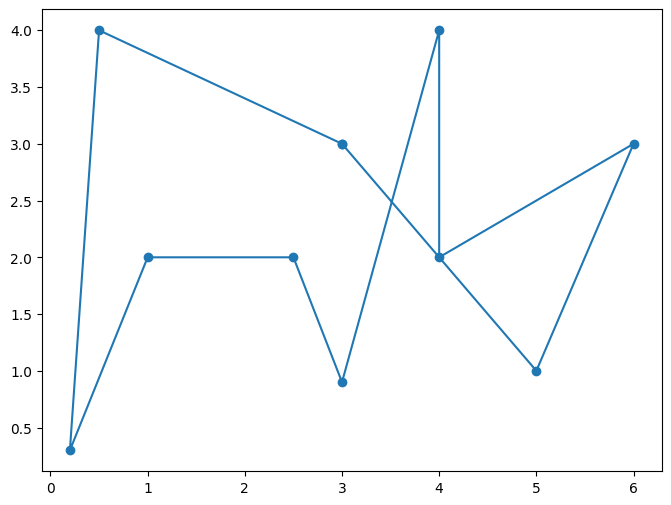

In [36]:
plotRundreise(Optimum, StaedteListe)

In [37]:
Optimum = Evolution(Population, StaedteListe, 10)
print(Optimum)

Die vermeintlich optimale Rundreise hat die Kosten 22.876494731003536
[3 1 0 4 9 6 2 7 8 5]


In [38]:
Optimum = Evolution(Population, StaedteListe, 30)
print(Optimum)

Die vermeintlich optimale Rundreise hat die Kosten 19.488509120233775
[0 7 2 5 3 8 1 6 4 9]


In [39]:
Optimum = Evolution(Population, StaedteListe, 1000)
print(Optimum)

Die vermeintlich optimale Rundreise hat die Kosten 19.488509120233775
[0 7 2 5 3 8 1 6 4 9]


Offensichtlich ist bereits nach $30$ Iterationen die wirklich optimale Rundreise gefunden. Sie hat folgende Form:

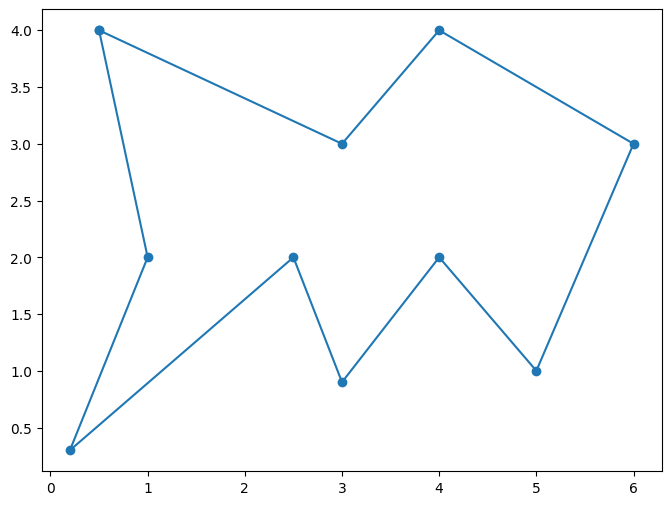

In [40]:
plotRundreise(Optimum, StaedteListe)